In [1]:
import numpy as np
import pandas as pd

In [2]:
loans=pd.read_csv('lending-club-data.csv')
loans.head()

C:\Users\Shaurya\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1,1,1,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1,1,1,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1,1,1,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1,1,1,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1,1,1,0,5.21533,20141201T000000,1,1,1


In [3]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', '

In [4]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans=loans.drop('bad_loans',axis=1)

In [5]:
loans.shape

(122607, 68)

In [6]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [7]:
loans = loans[[target] + features].dropna()

In [8]:
loans.head()

,safe_loans,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,...,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
0,1,B,0.4,0,11,RENT,27.65,credit_card,8.14350,0,...,0,1,83.7,0.00,10.65,861.07,24000,5000,4975,162.87
1,-1,C,0.8,1,1,RENT,1.00,car,2.39320,0,...,0,1,9.4,0.00,15.27,435.17,30000,2500,2500,59.83
2,1,C,1.0,0,11,RENT,8.72,small_business,8.25955,0,...,0,1,98.5,0.00,15.96,603.65,12252,2400,2400,84.33
3,1,C,0.2,0,11,RENT,20.00,other,8.27585,0,...,0,1,21.0,16.97,13.49,2209.33,49200,10000,10000,339.31
4,1,A,0.8,0,4,RENT,11.20,wedding,5.21533,0,...,0,1,28.3,0.00,7.90,631.38,36000,5000,5000,156.46


In [9]:
loans.shape

(122578, 25)

In [10]:
train=pd.read_json('https://s3.amazonaws.com/static.dato.com/files/coursera/course-3/indices-json/module-8-assignment-1-train-idx.json')
train_idx=[]
for i in train[0]:
    train_idx.append(i)

In [11]:
valid=pd.read_json('https://s3.amazonaws.com/static.dato.com/files/coursera/course-3/indices-json/module-8-assignment-1-validation-idx.json')
validation_idx=[]
for i in valid[0]:
    validation_idx.append(i)

In [12]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [13]:
train_data=pd.get_dummies(train_data)
validation_data=pd.get_dummies(validation_data)

In [14]:
train_data.shape

(37219, 45)

In [15]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [16]:
train_feature=train_data.drop('safe_loans',axis=1)
validation_feature=validation_data.drop('safe_loans',axis=1)
sample_validation_feature=sample_validation_data.drop('safe_loans',axis=1)

In [17]:
train_label=train_data['safe_loans']
validation_label=validation_data['safe_loans']
sample_validation_label=sample_validation_data['safe_loans']

In [18]:
train_feature=np.array(train_feature)
validation_feature=np.array(validation_feature)
sample_validation_feature=np.array(sample_validation_feature)
train_label=np.array(train_label)
validation_label=np.array(validation_label)
sample_validation_label=np.array(sample_validation_label)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
model_5=GradientBoostingClassifier( max_depth=6,n_estimators=5)
model_5.fit(train_feature,train_label)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [21]:
model_5.predict(sample_validation_feature)

array([ 1,  1, -1,  1], dtype=int64)

In [22]:
model_5.predict_proba(sample_validation_feature)

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

In [23]:
y_pred=model_5.predict(validation_feature)

In [31]:
model_5.score(validation_feature,validation_label)

0.66146057733735464

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(validation_label,y_pred)

0.66146057733735464

In [26]:
false_positives = 0

for i in range(len(validation_data)):
    if validation_label[i] == -1 and y_pred[i] == +1:
        false_positives += 1

print false_positives

1652


In [27]:
false_negatives = 0

for i in range(len(validation_data)):
    if validation_label[i] == +1 and y_pred[i]== -1:
        false_negatives += 1

print false_negatives

1491


In [28]:
print false_negatives*10000 + false_positives*20000

47950000


## ---------------------------------------------------------------------------------------------------------------

In [33]:
model_10=GradientBoostingClassifier( max_depth=6,n_estimators=10)
model_10.fit(train_feature,train_label)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
model_50=GradientBoostingClassifier( max_depth=6,n_estimators=50)
model_50.fit(train_feature,train_label)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
model_100=GradientBoostingClassifier( max_depth=6,n_estimators=100)
model_100.fit(train_feature,train_label)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
model_200=GradientBoostingClassifier( max_depth=6,n_estimators=200)
model_200.fit(train_feature,train_label)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [37]:
model_500=GradientBoostingClassifier( max_depth=6,n_estimators=500)
model_500.fit(train_feature,train_label)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
print model_10.score(validation_feature,validation_label)
print model_50.score(validation_feature,validation_label)
print model_100.score(validation_feature,validation_label)
print model_200.score(validation_feature,validation_label)
print model_500.score(validation_feature,validation_label)

0.666415338216
0.684618698837
0.68935803533
0.685911245153
0.688604049978


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [42]:
train_err_10=1- model_10.score(train_feature,train_label)
train_err_50=1- model_50.score(train_feature,train_label)
train_err_100=1- model_100.score(train_feature,train_label)
train_err_200=1- model_200.score(train_feature,train_label)
train_err_500=1- model_500.score(train_feature,train_label)

In [43]:
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [44]:
validation_err_10=1- model_10.score(validation_feature,validation_label)
validation_err_50=1- model_50.score(validation_feature,validation_label)
validation_err_100=1- model_100.score(validation_feature,validation_label)
validation_err_200=1- model_200.score(validation_feature,validation_label)
validation_err_500=1- model_500.score(validation_feature,validation_label)

In [45]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

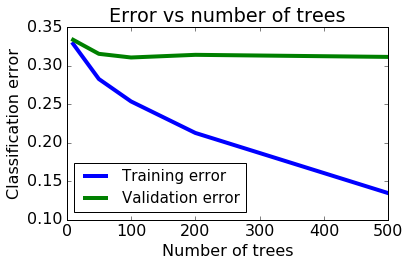

In [46]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')